In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import tensorflow as tf

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar-10labels/trainLabels.csv


In [2]:
NUM_CLASSES = 10
KERNEL_SIZE = (2, 2)
POOL_SIZE = (2, 2)
INPUT_SHAPE = (32, 32, 3)

In [3]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[0]

array([6], dtype=uint8)

In [69]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [40]:
labels

,label
id,
1,frog
2,truck
3,truck
4,deer
5,automobile
...,...
49996,bird
49997,frog
49998,truck


In [9]:
x_train.max()

255

In [10]:
x_test.max()

255

In [11]:
# Normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

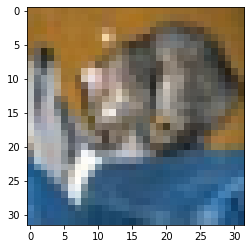

In [12]:
plt.imshow(x_test[0])

In [13]:
y_train_cat = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)

In [14]:
y_test_cat = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

### Building model

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=POOL_SIZE),
    tf.keras.layers.Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=POOL_SIZE),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 31, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1606144   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0

In [17]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

In [18]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15) 
]

In [19]:
hist = model.fit(
    x_train, y_train_cat, batch_size=64, epochs=25, callbacks=callbacks, validation_data=(x_test, y_test_cat)
)

Epoch 1/25
782/782 [==============================] - 10s 7ms/step - loss: 2.0337 - acc: 0.2138 - val_loss: 1.3994 - val_acc: 0.4973
Epoch 2/25
782/782 [==============================] - 5s 6ms/step - loss: 1.4119 - acc: 0.4916 - val_loss: 1.1313 - val_acc: 0.6027
Epoch 3/25
782/782 [==============================] - 6s 7ms/step - loss: 1.1697 - acc: 0.5967 - val_loss: 1.0256 - val_acc: 0.6449
Epoch 4/25
782/782 [==============================] - 5s 6ms/step - loss: 1.0407 - acc: 0.6489 - val_loss: 1.0058 - val_acc: 0.6569
Epoch 5/25
782/782 [==============================] - 5s 6ms/step - loss: 0.9359 - acc: 0.6875 - val_loss: 0.9460 - val_acc: 0.6774
Epoch 6/25
782/782 [==============================] - 5s 6ms/step - loss: 0.8437 - acc: 0.7191 - val_loss: 0.9547 - val_acc: 0.6898
Epoch 7/25
782/782 [==============================] - 5s 6ms/step - loss: 0.7761 - acc: 0.7432 - val_loss: 0.9257 - val_acc: 0.6996
Epoch 8/25
782/782 [==============================] - 5s 6ms/step - loss: 0

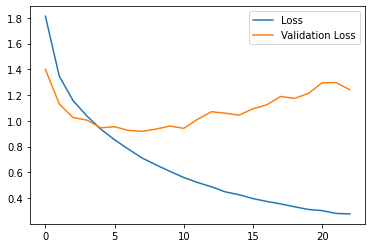

In [30]:
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

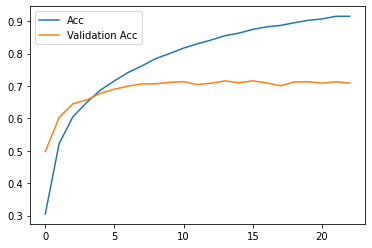

In [29]:
plt.plot(hist.history['acc'], label='Acc')
plt.plot(hist.history['val_acc'], label='Validation Acc')
plt.legend()
plt.show()

In [32]:
print(model.metrics_names)
print(model.evaluate(x_test,y_test_cat,verbose=0))

['loss', 'acc']
[1.242469072341919, 0.7088000178337097]


### Prediction

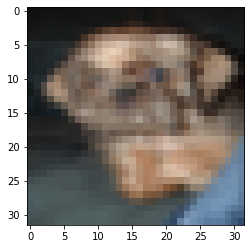

In [79]:
img_pred = x_test[155]
plt.imshow(img_pred)

In [80]:
img_pred = img_pred.reshape(1,32,32,3)

predictions = np.argmax(model.predict(img_pred), axis=-1)[0]

In [81]:
predictions

5

In [82]:
labels[predictions]

'dog'